Persiapan dan Pembersihan Data

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/dataset_banjir (1).csv'

try:
    df = pd.read_csv(file_path, sep=';', header=1)
except Exception as e:
    print(f"Error saat membaca file: {e}")
    print("Pastikan nama file dan delimiter sudah benar (';')")
    df = pd.read_csv(file_path, sep=';')

print("--- Data Awal ---")
print(df.head())
print("\n")

# Langkah 1: Pembersihan Data
df = df.dropna(axis=1, how='all')

# 2. Mengantisipasi Jika Adanya Baris Duplikat
df = df.drop_duplicates()

# 3. Mengganti Nama Kolom agar Lebih Rapi
df.columns = ['Kabupaten_Kota', 'Banjir', 'Banjir_Bandang', 'Curah_Hujan']

# 4. Mengubah Tipe Data ke Numerik
kolom_numerik = ['Banjir', 'Banjir_Bandang', 'Curah_Hujan']

for col in kolom_numerik:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5. Menangani Nilai Hilang (NaN)
df[kolom_numerik] = df[kolom_numerik].fillna(0)

# 6. Pengecekan Akhir
print("--- Data Setelah Pembersihan ---")
print(df.info())
print("\n")
print(df.head())

--- Data Awal ---
        Cilacap   69  7  201,71  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0      Banyumas   84  2  232,91         NaN         NaN         NaN   
1   Purbalingga   26  0  153,08         NaN         NaN         NaN   
2  Banjarnegara    8  0  150,19         NaN         NaN         NaN   
3       Kebumen  112  3  212,12         NaN         NaN         NaN   
4     Purworejo   74  0   88,81         NaN         NaN         NaN   

   Unnamed: 7      
0         NaN NaN  
1         NaN NaN  
2         NaN NaN  
3         NaN NaN  
4         NaN NaN  


--- Data Setelah Pembersihan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten_Kota  34 non-null     object 
 1   Banjir          34 non-null     int64  
 2   Banjir_Bandang  34 non-null     int64  
 3   Curah_Hujan     34 non-null     float64
dtypes: float64(1), int64(2)

Analisis Data Eksplorasi (EDA)

/tmp/ipython-input-1093791018.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Bencana', y='Kabupaten_Kota', data=df_top, palette='Reds_d')


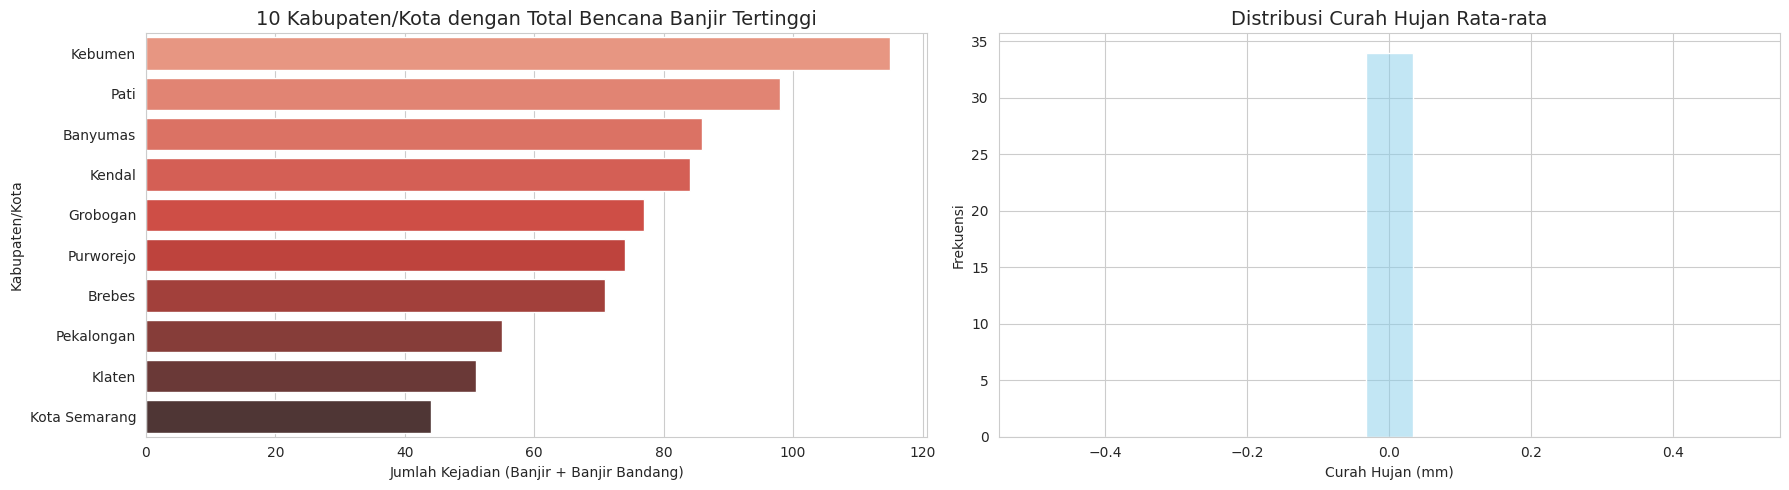

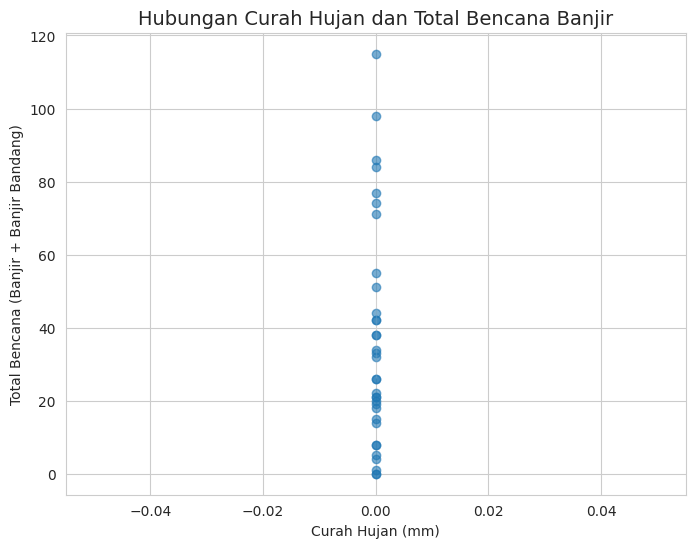

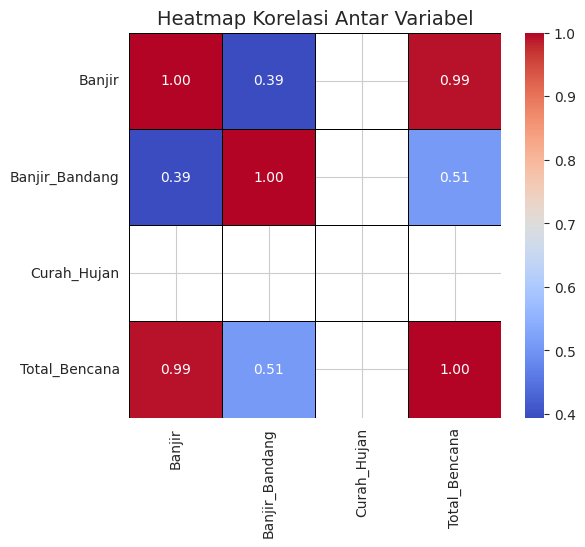


--- Ringkasan Statistik ---
           Banjir  Banjir_Bandang  Curah_Hujan
count   34.000000       34.000000         34.0
mean    34.705882        1.823529          0.0
std     28.225853        4.238858          0.0
min      0.000000        0.000000          0.0
25%     15.500000        0.000000          0.0
50%     28.500000        1.000000          0.0
75%     49.000000        2.000000          0.0
max    112.000000       24.000000          0.0


In [99]:
# Langkah 2: Analisis Data Eksplorasi (EDA)

df['Total_Bencana'] = df['Banjir'] + df['Banjir_Bandang']

sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# A. Visualisasi Perbandingan (Top Sekian Kejadian)
# 1. Top 10 Kabupaten/Kota dengan Total Bencana Tertinggi
df_top = df.sort_values(by='Total_Bencana', ascending=False).head(10)

plt.subplot(1, 2, 1)
sns.barplot(x='Total_Bencana', y='Kabupaten_Kota', data=df_top, palette='Reds_d')
plt.title('10 Kabupaten/Kota dengan Total Bencana Banjir Tertinggi', fontsize=14)
plt.xlabel('Jumlah Kejadian (Banjir + Banjir Bandang)')
plt.ylabel('Kabupaten/Kota')

# 2. Distribusi Curah Hujan
plt.subplot(1, 2, 2)
sns.histplot(df['Curah_Hujan'], bins=15, kde=True, color='skyblue')
plt.title('Distribusi Curah Hujan Rata-rata', fontsize=14)
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# B. Analisis Korelasi
# 3. Scatter Plot Curah Hujan vs. Total Bencana (untuk melihat tren)
plt.figure(figsize=(8, 6))
sns.regplot(x='Curah_Hujan', y='Total_Bencana', data=df,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Hubungan Curah Hujan dan Total Bencana Banjir', fontsize=14)
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Total Bencana (Banjir + Banjir Bandang)')
plt.show()

# 4. Heatmap Korelasi
kor_matrix = df[['Banjir', 'Banjir_Bandang', 'Curah_Hujan', 'Total_Bencana']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(kor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Heatmap Korelasi Antar Variabel', fontsize=14)
plt.show()

print("\n--- Ringkasan Statistik ---")
print(df[kolom_numerik].describe())

Pembuatan dan Evaluasi Model Prediksi


--- Memulai Pembuatan Model Prediksi ---
Ukuran Data Latih (Training): 27 sampel
Ukuran Data Uji (Testing): 7 sampel

Model Linear Regression berhasil dilatih.
Koefisien (Slope): 0.0000
Intercept: 35.0370

--- Metrik Evaluasi Model (pada Data Uji) ---
Mean Squared Error (MSE): 381.60
Root Mean Squared Error (RMSE): 19.53
R-squared (R2 Score): -0.16


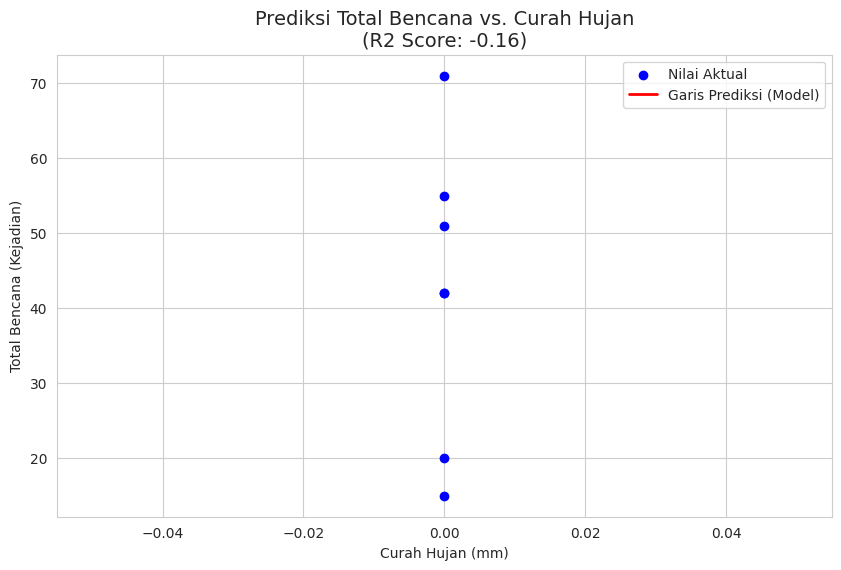


Jika Curah Hujan adalah 250 mm, prediksi Total Bencana adalah sekitar 35 kejadian.

Model telah disimpan sebagai: model_prediksi_banjir.pkl
File ini siap untuk di-deploy ke Dashboard.


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Langkah 3: Pembuatan Model Prediksi

print("\n--- Memulai Pembuatan Model Prediksi ---")

# 1. Definisikan Variabel (X = Fitur, y = Target)
# X adalah Curah Hujan, y adalah Total Bencana (Banjir + Banjir Bandang)
X = df[['Curah_Hujan']]
y = df['Total_Bencana']

# 2. Bagi Data menjadi Data Latih (Training) dan Data Uji (Testing)
# Kita gunakan 80% untuk melatih dan 20% untuk menguji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Latih (Training): {len(X_train)} sampel")
print(f"Ukuran Data Uji (Testing): {len(X_test)} sampel")

# 3. Inisialisasi dan Latih Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Linear Regression berhasil dilatih.")
print(f"Koefisien (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# 4. Prediksi dan Evaluasi Model
y_pred = model.predict(X_test)

# Hitung Metrik Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Metrik Evaluasi Model (pada Data Uji) ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# 5. Visualisasi Hasil Prediksi vs. Aktual (untuk Data Uji)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Nilai Aktual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Garis Prediksi (Model)')
plt.title(f'Prediksi Total Bencana vs. Curah Hujan\n(R2 Score: {r2:.2f})', fontsize=14)
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Total Bencana (Kejadian)')
plt.legend()
plt.show()
#

# 6. Contoh Prediksi (Untuk Curah Hujan tertentu)
curah_hujan_baru = 250  # Contoh
prediksi_kejadian = model.predict(pd.DataFrame([[curah_hujan_baru]], columns=['Curah_Hujan']))

print(f"\nJika Curah Hujan adalah {curah_hujan_baru} mm, prediksi Total Bencana adalah sekitar {prediksi_kejadian[0]:.0f} kejadian.")

# Langkah 4: Simpan Model untuk Deployment
# Simpan model menggunakan joblib
model_filename = 'model_prediksi_banjir.pkl'
joblib.dump(model, model_filename)

print(f"\nModel telah disimpan sebagai: {model_filename}")
print("File ini siap untuk di-deploy ke Dashboard.")